# Odd Even Vetter Example

This vetter looks for eclipsing binaries mascarading as transits.  Planet transit detection algorithms often find eclipsing binaries at half the period. In this case, the primary eclipse will be the odd events and the secondary eclipse will be the even transits. The odd-even transit vetter looks for this possibility by examining the depth of the even numbered transits compared to the odd numbered transits. If the depth changes, likely you have an eclipsing binary detected at half its period.

In [1]:
from exovetter.tce import Tce
import lightkurve as lk
from exovetter import vetters as vet
import matplotlib.pyplot as plt
%matplotlib inline

Exovetter vetting alogrithms use TCE and lightkurve objects as input, the following TCE and light curve files were made for the known planet WASP-18 b in the TCE and lightcurves notebooks. 

In [2]:
# WASP-18 b TCE:
tce = Tce.from_json('wasp18b_tce')

tce

{'period': <Quantity 0.94145223 d>,
 'epoch': <Quantity 58374.669883 d>,
 'epoch_offset': <Quantity -2400000.5 d>,
 'depth': <Quantity 0.00931894>,
 'duration': <Quantity 0.08932 d>,
 'snr': 50,
 'event_name': 'WASP-18 b',
 'target_name': 'WASP-18'}

<Figure size 640x480 with 0 Axes>

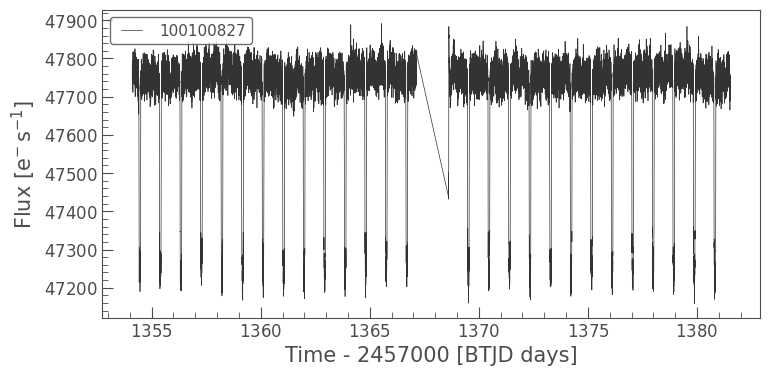

In [3]:
# Cleaned WASP-18 b lightkurve object
lc = lk.read('WASP18b_lightcurve.fits')

# plot light curve
plt.figure()
lc.plot()
plt.show()

Vetters are run by first creating an instance of the vetter object in order to specify parameters to desired values then running the object to obtain the results. Here we use the default options (hence the lack of arguments to `vet.OddEven`). 

In order to run the initialized vetter we use the `run` method which takes a TCE and a lightkurve object as inputs. This returns a dictionary of results.

In [4]:
odd_even_instance = vet.OddEven()
odd_even_results = odd_even_instance.run(tce, lc)

odd_even_results

with epoch= 58374.6698830002 d and epoch_offset= -2400000.5 d
offset subtracted to get  2458375.169883 d
with offset= -2457000.0 d added to this new epoch  2458375.169883 d  to get  1375.1698830001988 d  the final returned epoch


{'oe_sigma': 0.07448509958969717,
 'odd_depth': [47246.242, 26.217728],
 'even_depth': [47243.48, 26.217728]}

In Odd Even, the results are as follows: "**Better description of these values and their use"**
* oe_sigma : significance of difference of odd/even depth measurements
* odd_depth : depth and error on depth of the odd transits
* even_depth : depth and error on depth of the even transits

The following attributes are also available after running the vetter object:
* odd_depth : depth and error on depth of the odd transits.
* even_depth : depth and error on depth of the even transits.
* oe_sigma : significance of difference of odd/even depth measurements.
* metrics : modshift result dictionary.

In order to generate diagnostic plots from vetters, we can either use the `plot` method with the vetter object after it has been run, or use `plot=True` as a parameter to the `run` method to do both run and plot at the same time

<Figure size 640x480 with 0 Axes>

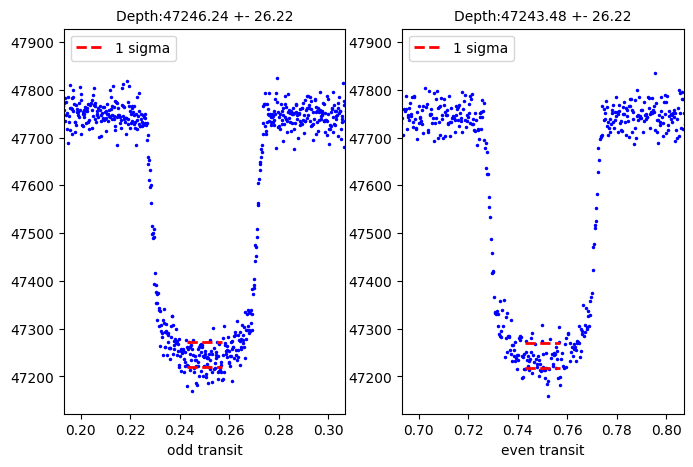

In [5]:
plt.figure()
odd_even_instance.plot()
plt.show()

with epoch= 58374.6698830002 d and epoch_offset= -2400000.5 d
offset subtracted to get  2458375.169883 d
with offset= -2457000.0 d added to this new epoch  2458375.169883 d  to get  1375.1698830001988 d  the final returned epoch


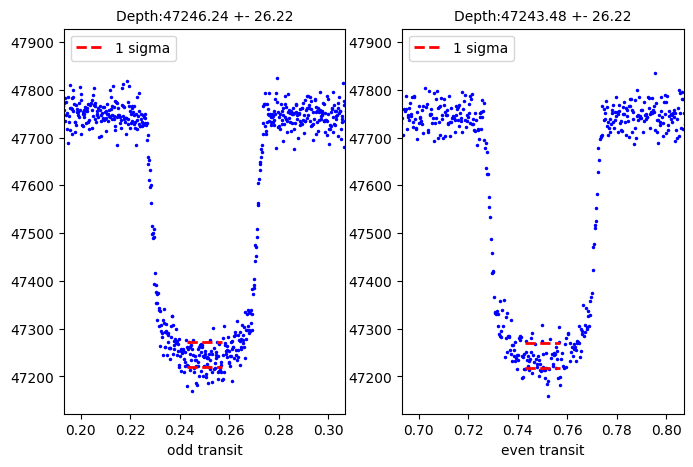

In [6]:
odd_even_results = odd_even_instance.run(tce, lc, plot=True)